In [2]:
%matplotlib inline
import os
# from subprocess import check_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix


np.random.seed(42)

atl_weather_data = pd.read_csv('atl_weather.csv')
atl_weather_data.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,UniqueCarrier,FlightNum,Distance,Dest,Cancelled,Temp,Temp_Avg,Visibility_High,Visibility_Avg,Wind_High,Wind_Avg
0,1,19,6,916.0,900,XE,1265,745,ATL,0,43,36,10,7,22,10
1,1,16,3,2102.0,1739,XE,2622,689,ATL,0,39,35,10,6,23,11
2,1,22,2,919.0,900,XE,2023,554,ATL,0,41,37,10,7,17,7
3,1,1,2,1127.0,1035,XE,1221,745,ATL,0,47,39,10,10,30,16
4,1,5,6,1733.0,1720,XE,2562,689,ATL,0,55,43,10,10,14,6


In [3]:
#check unique values in Temp_Avg column
tunique = atl_weather_data['Temp_Avg'].unique()
print tunique


[36 35 37 39 43 25 40 48 54 61 52 28 45 46 58 63 51 49 24 31 44 59 50 60 47
 33 41 56 53 62 65 57 42 68 66 73 67 72 64 55 71 70 76 69 74 79 75 82 81 80
 84 78 83 85 77 38 26]


In [4]:
# #remove rows with Temp_Avg == nan
atl_weather_data = atl_weather_data.dropna(subset=['Temp_Avg'])
tunique = atl_weather_data['Temp_Avg'].unique()
print "Unique values: ", tunique
print "# of Samples: ", len(atl_weather_data)

Unique values:  [36 35 37 39 43 25 40 48 54 61 52 28 45 46 58 63 51 49 24 31 44 59 50 60 47
 33 41 56 53 62 65 57 42 68 66 73 67 72 64 55 71 70 76 69 74 79 75 82 81 80
 84 78 83 85 77 38 26]
# of Samples:  106898


In [8]:
#split training and testing data
X = atl_weather_data[['Month','DayofMonth','DepTime','CRSDepTime','Distance','Temp_Avg']].values
y = atl_weather_data['Cancelled'].values

# X = X.astype(np.float)
y = y.astype(np.float).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=50)

print X_train.shape, X_test.shape, y_train.shape, y_test.shape

y_train.d

(64138, 6) (42760, 6) (64138, 1) (42760, 1)


array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]])

Using Theano backend.


Train on 85518 samples, validate on 21380 samples
Epoch 1/60
85518/85518 [==============================] - 0s - loss: 1221.8096 - val_loss: 346.7931
Epoch 2/60
85518/85518 [==============================] - 0s - loss: 346.7921 - val_loss: 346.7919
Epoch 3/60
85518/85518 [==============================] - 0s - loss: 346.7910 - val_loss: 346.7908
Epoch 4/60
85518/85518 [==============================] - 0s - loss: 346.7899 - val_loss: 346.7897
Epoch 5/60
85518/85518 [==============================] - 0s - loss: 346.7888 - val_loss: 346.7886
Epoch 6/60
85518/85518 [==============================] - 0s - loss: 346.7877 - val_loss: 346.7875
Epoch 7/60
85518/85518 [==============================] - 0s - loss: 346.7866 - val_loss: 346.7865
Epoch 8/60
85518/85518 [==============================] - 0s - loss: 346.7855 - val_loss: 346.7854
Epoch 9/60
85518/85518 [==============================] - 0s - loss: 346.7844 - val_loss: 346.7843
Epoch 10/60
85518/85518 [==============================] -

C:\Users\bjoyn\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


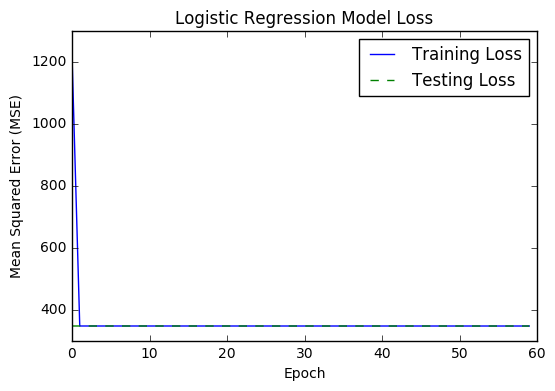

In [5]:
#import keras for training
import theano
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

#logistic regression

#Stochastic Logistic Regression
model = Sequential()

# validation loss 
model.add(Dense(output_dim=1, input_shape=[X_train.shape[1]], 
                activation='relu', W_regularizer=l1(0.01)))

# Compile model
sgd = SGD(lr=0.01)
model.compile(loss='mean_squared_error', optimizer=sgd)

# Fit the model
history = model.fit(X_train, y_train, batch_size = 256,
          nb_epoch = 60, verbose=1, validation_data=(X_test,y_test))

fig = plt.figure(figsize=(6,4))

# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')

#classification report
predicted = history.model.predict_classes(X_test)
print 'Logistic Regression Results: \n Accuracy:',accuracy_score(y_test,predicted)
print 'Confusion Matrix:'
print confusion_matrix(y_test,predicted)
print 'Classification Report:'
print classification_report(y_test,predicted)
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()